##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE217517**

file previously downloaded:
GSE217517_RAW.tar

unzipped using 
``` bash
tar -xvf GSE217517_RAW.tar
```

This gives the following files: 
* GSM6720925_single_cell_barcodes_2251.tsv.gz
* GSM6720925_single_cell_features_2251.tsv.gz
* GSM6720925_single_cell_matrix_2251.mtx.gz
* GSM6720926_single_cell_barcodes_2267.tsv.gz
* GSM6720926_single_cell_features_2267.tsv.gz
* GSM6720926_single_cell_matrix_2267.mtx.gz
* GSM6720927_single_cell_barcodes_2283.tsv.gz
* GSM6720927_single_cell_features_2283.tsv.gz
* GSM6720927_single_cell_matrix_2283.mtx.gz
* GSM6720928_single_cell_barcodes_2293.tsv.gz
* GSM6720928_single_cell_features_2293.tsv.gz
* GSM6720928_single_cell_matrix_2293.mtx.gz
* GSM6720929_single_cell_barcodes_2380.tsv.gz
* GSM6720929_single_cell_features_2380.tsv.gz
* GSM6720929_single_cell_matrix_2380.mtx.gz
* GSM6720930_single_cell_barcodes_2428.tsv.gz
* GSM6720930_single_cell_features_2428.tsv.gz
* GSM6720930_single_cell_matrix_2428.mtx.gz
* GSM6720931_single_cell_barcodes_2467.tsv.gz
* GSM6720931_single_cell_features_2467.tsv.gz
* GSM6720931_single_cell_matrix_2467.mtx.gz
* GSM6720932_single_cell_barcodes_2497.tsv.gz
* GSM6720932_single_cell_features_2497.tsv.gz
* GSM6720932_single_cell_matrix_2497.mtx.gz
* GSM6720933_pooled_single_cell_barcodes_12162021.tsv.gz
* GSM6720933_pooled_single_cell_features_12162021.tsv.gz
* GSM6720933_pooled_single_cell_matrix_12162021.mtx.gz
* GSM6720934_pooled_single_cell_barcodes_01132022.tsv.gz
* GSM6720934_pooled_single_cell_features_01132022.tsv.gz
* GSM6720934_pooled_single_cell_matrix_01132022.mtx.gz
* GSM6720935_bulk_chunk_ribo_2251_STAR.tsv.gz
* GSM6720936_bulk_chunk_ribo_2267_STAR.tsv.gz
* GSM6720937_bulk_chunk_ribo_2283_STAR.tsv.gz
* GSM6720938_bulk_chunk_ribo_2293_STAR.tsv.gz
* GSM6720939_bulk_chunk_ribo_2380_STAR.tsv.gz
* GSM6720940_bulk_chunk_ribo_2428_STAR.tsv.gz
* GSM6720941_bulk_chunk_ribo_2467_STAR.tsv.gz
* GSM6720942_bulk_chunk_ribo_2497_STAR.tsv.gz
* GSM6720943_bulk_dissociated_ribo_2251_STAR.tsv.gz
* GSM6720944_bulk_dissociated_ribo_2267_STAR.tsv.gz
* GSM6720945_bulk_dissociated_ribo_2283_STAR.tsv.gz
* GSM6720946_bulk_dissociated_ribo_2293_STAR.tsv.gz
* GSM6720947_bulk_dissociated_ribo_2380_STAR.tsv.gz
* GSM6720948_bulk_dissociated_ribo_2428_STAR.tsv.gz
* GSM6720949_bulk_dissociated_ribo_2467_STAR.tsv.gz
* GSM6720950_bulk_dissociated_ribo_2497_STAR.tsv.gz
* GSM6720951_bulk_dissociated_polyA_2251_STAR.tsv.gz
* GSM6720952_bulk_dissociated_polyA_2267_STAR.tsv.gz
* GSM6720953_bulk_dissociated_polyA_2283_STAR.tsv.gz
* GSM6720954_bulk_dissociated_polyA_2293_STAR.tsv.gz
* GSM6720955_bulk_dissociated_polyA_2380_STAR.tsv.gz
* GSM6720956_bulk_dissociated_polyA_2428_STAR.tsv.gz
* GSM6720957_bulk_dissociated_polyA_2467_STAR.tsv.gz
* GSM6720958_bulk_dissociated_polyA_2497_STAR.tsv.gz

Only interested in scRNAseq files.
Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE217517')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE217517"

[1] "/scratch/user/s4436039/scdata/GSE217517"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [8]:
#load all datasets
OC_2251.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2251")
OC_2267.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2267")
OC_2283.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2283")
OC_2293.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2293")
OC_2380.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2380")
OC_2428.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2428")
OC_2467.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2467")
OC_2497.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE217517/pt_2497")


In [9]:
#Add dataset info to colnames
colnames(OC_2251.data) <- paste0("GSE217517_pt1_", colnames(OC_2251.data))
colnames(OC_2267.data) <- paste0("GSE217517_pt2_", colnames(OC_2267.data))
colnames(OC_2283.data) <- paste0("GSE217517_pt3_", colnames(OC_2283.data))
colnames(OC_2293.data) <- paste0("GSE217517_pt4_", colnames(OC_2293.data))
colnames(OC_2380.data) <- paste0("GSE217517_pt5_", colnames(OC_2380.data))
colnames(OC_2428.data) <- paste0("GSE217517_pt6_", colnames(OC_2428.data))
colnames(OC_2467.data) <- paste0("GSE217517_pt7_", colnames(OC_2467.data))
colnames(OC_2497.data) <- paste0("GSE217517_pt8_", colnames(OC_2497.data))


In [10]:
head(colnames(OC_2497.data))

[1] "GSE217517_pt8_AAACCCAAGCACTAAA-1" "GSE217517_pt8_AAACCCAAGGCATCTT-1"
[3] "GSE217517_pt8_AAACCCACAAGTCCCG-1" "GSE217517_pt8_AAACCCACAATTTCGG-1"
[5] "GSE217517_pt8_AAACCCACAGGCTATT-1" "GSE217517_pt8_AAACCCAGTATCCTCC-1"

In [11]:
#create seperate seurat object for each sample
OC_pt1 <- CreateSeuratObject(counts = OC_2251.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt1@meta.data$sample_type <- "tumour"
OC_pt1@meta.data$cancer_type <- "HGSOC"
OC_pt1@meta.data$patient_id <- "pt1"
OC_pt1@meta.data$sample_id <- "GSE217517_HGSOC_pt1"

#create seperate seurat object for each sample
OC_pt2 <- CreateSeuratObject(counts = OC_2267.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt2@meta.data$sample_type <- "tumour"
OC_pt2@meta.data$cancer_type <- "HGSOC"
OC_pt2@meta.data$patient_id <- "pt2"
OC_pt2@meta.data$sample_id <- "GSE217517_HGSOC_pt2"

#create seperate seurat object for each sample
OC_pt3 <- CreateSeuratObject(counts = OC_2283.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt3@meta.data$sample_type <- "tumour"
OC_pt3@meta.data$cancer_type <- "HGSOC"
OC_pt3@meta.data$patient_id <- "pt3"
OC_pt3@meta.data$sample_id <- "GSE217517_HGSOC_pt3"

#create seperate seurat object for each sample
OC_pt4 <- CreateSeuratObject(counts = OC_2293.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt4@meta.data$sample_type <- "tumour"
OC_pt4@meta.data$cancer_type <- "HGSOC"
OC_pt4@meta.data$patient_id <- "pt4"
OC_pt4@meta.data$sample_id <- "GSE217517_HGSOC_pt4"

#create seperate seurat object for each sample
OC_pt5 <- CreateSeuratObject(counts = OC_2380.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt5@meta.data$sample_type <- "tumour"
OC_pt5@meta.data$cancer_type <- "HGSOC"
OC_pt5@meta.data$patient_id <- "pt5"
OC_pt5@meta.data$sample_id <- "GSE217517_HGSOC_pt5"

#create seperate seurat object for each sample
OC_pt6 <- CreateSeuratObject(counts = OC_2428.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt6@meta.data$sample_type <- "tumour"
OC_pt6@meta.data$cancer_type <- "HGSOC"
OC_pt6@meta.data$patient_id <- "pt6"
OC_pt6@meta.data$sample_id <- "GSE217517_HGSOC_pt6"

#create seperate seurat object for each sample
OC_pt7 <- CreateSeuratObject(counts = OC_2467.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt7@meta.data$sample_type <- "tumour"
OC_pt7@meta.data$cancer_type <- "HGSOC"
OC_pt7@meta.data$patient_id <- "pt7"
OC_pt7@meta.data$sample_id <- "GSE217517_HGSOC_pt7"

#create seperate seurat object for each sample
OC_pt8 <- CreateSeuratObject(counts = OC_2497.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt8@meta.data$sample_type <- "tumour"
OC_pt8@meta.data$cancer_type <- "HGSOC"
OC_pt8@meta.data$patient_id <- "pt8"
OC_pt8@meta.data$sample_id <- "GSE217517_HGSOC_pt8"

In [12]:
head(OC_pt4@meta.data) 

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt4_AAACCCAAGATACAGT-1 GSE217517    642       382         tumour     
GSE217517_pt4_AAACCCAAGGATTTGA-1 GSE217517   1318       685         tumour     
GSE217517_pt4_AAACCCAAGTATGAGT-1 GSE217517  24782      3839         tumour     
GSE217517_pt4_AAACCCACAATTGTGC-1 GSE217517   2280       904         tumour     
GSE217517_pt4_AAACCCACACACGCCA-1 GSE217517   2087      1015         tumour     
GSE217517_pt4_AAACCCACAGCCGGTT-1 GSE217517   1946      1060         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt4_AAACCCAAGATACAGT-1 HGSOC       pt4        GSE217517_HGSOC_pt4
GSE217517_pt4_AAACCCAAGGATTTGA-1 HGSOC       pt4        GSE217517_HGSOC_pt4
GSE217517_pt4_AAACCCAAGTATGAGT-1 HGSOC       pt4        GSE217517_HGSOC_pt4
GSE217517_pt4_AAACCCACAATTGTGC-1 HGSOC       pt4        GSE217517_HGSOC_pt4
GSE217517_pt4_AAACCCACACACGCCA-1 HGSOC       pt4        GSE217517_HGSOC_pt4
GSE217517_pt4_AAACCCACAGCCGGTT-1 HGSOC       pt4        GSE217517_HGSOC_pt4

In [14]:
#Merge seurat objects

OC <- merge(OC_pt1, y = c(OC_pt2, OC_pt3, OC_pt4, OC_pt5, OC_pt6, OC_pt7, OC_pt8), project = "GSE217517")

In [15]:
OC
head(OC@meta.data)
tail(OC@meta.data)

An object of class Seurat 
36601 features across 75508 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt8_TTTGTTGCAATGAAAC-1 GSE217517   6886      2130         tumour     
GSE217517_pt8_TTTGTTGCACAAGGTG-1 GSE217517   3554      1144         tumour     
GSE217517_pt8_TTTGTTGCAGAACTAA-1 GSE217517  18203      3590         tumour     
GSE217517_pt8_TTTGTTGCATCTTTCA-1 GSE217517  30411      5451         tumour     
GSE217517_pt8_TTTGTTGGTGTAACGG-1 GSE217517   3128      1167         tumour     
GSE217517_pt8_TTTGTTGGTTGTTTGG-1 GSE217517   4855      1581         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt8_TTTGTTGCAATGAAAC-1 HGSOC       pt8        GSE217517_HGSOC_pt8
GSE217517_pt8_TTTGTTGCACAAGGTG-1 HGSOC       pt8        GSE217517_HGSOC_pt8
GSE217517_pt8_TTTGTTGCAGAACTAA-1 HGSOC       pt8        GSE217517_HGSOC_pt8
GSE217517_pt8_TTTGTTGCATCTTTCA-1 HGSOC       pt8        GSE217517_HGSOC_pt8
GSE217517_pt8_TTTGTTGGTGTAACGG-1 HGSOC       pt8        GSE217517_HGSOC_pt8
GSE217517_pt8_TTTGTTGGTTGTTTGG-1 HGSOC       pt8        GSE217517_HGSOC_pt8

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


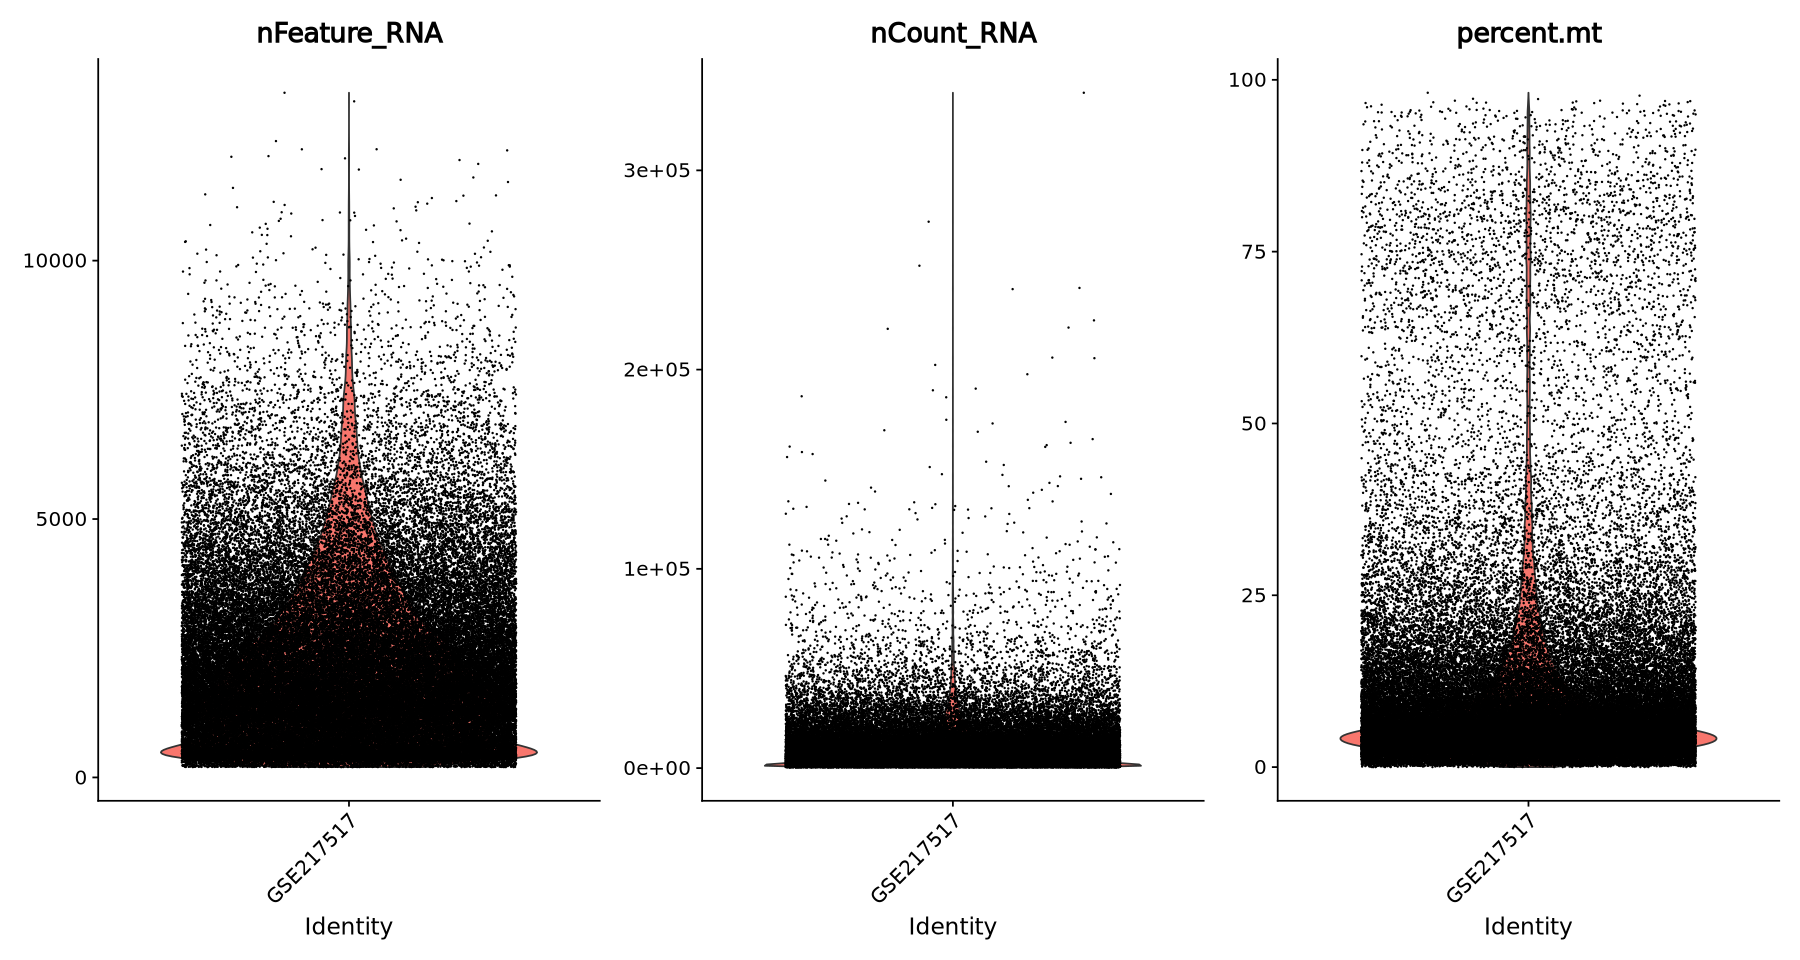

In [16]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [17]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  CD74, CD52, HLA-DRB1, ITGB2, HLA-DPA1, RGS1, HLA-DRA, HLA-DPB1, HLA-DQB1, TYROBP 
	   CTSS, HLA-DQA1, AIF1, FCER1G, CCL3, GPR183, BCL2A1, PLEK, IFI30, ALOX5AP 
	   LYZ, LST1, CD83, HLA-DMA, CCL3L1, SPI1, CCL5, CYBB, NLRP3, CLEC7A 
Negative:  CALD1, COL6A2, IGFBP7, SPARC, COL1A1, COL1A2, COL3A1, COL6A1, AEBP

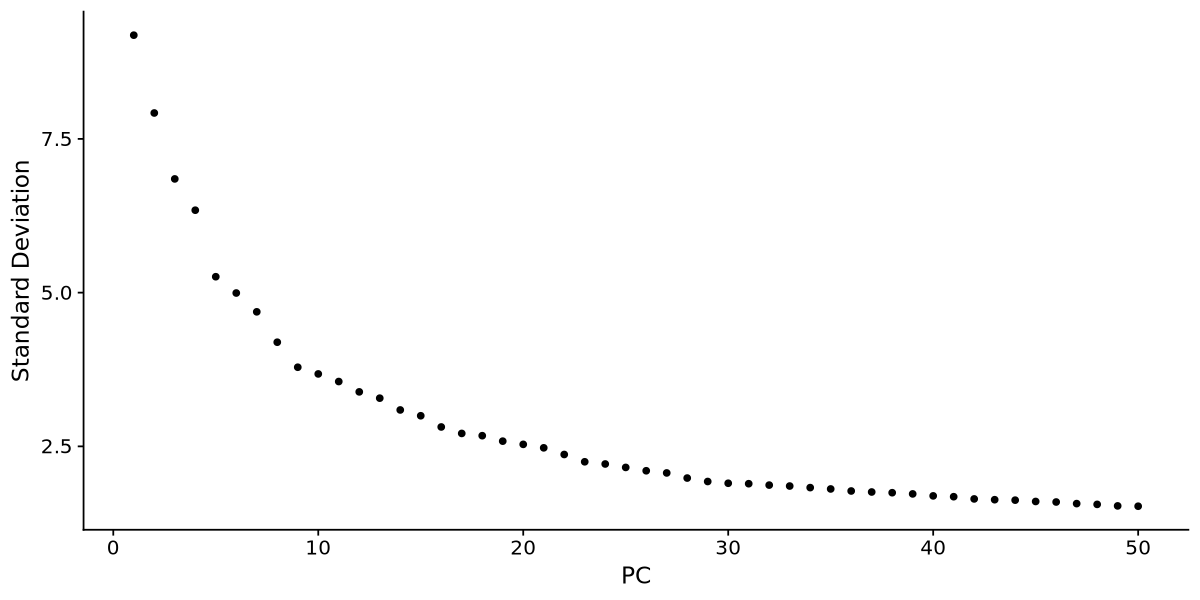

In [18]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [19]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [20]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:17:15 UMAP embedding parameters a = 0.9922 b = 1.112

17:17:15 Read 75508 rows and found 40 numeric columns

17:17:15 Using Annoy for neighbor search, n_neighbors = 30

17:17:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:17:21 Writing NN index file to temp file /scratch/temp/9155684/RtmpEZgdBr/file28995d157b702

17:17:21 Searching Annoy index using 1 thread, search_k = 3000

17:17:43 Annoy recall = 100%

17:17:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:17:45 Initializing from normalized Laplacian + noise (using RSpectra)

17:17:48 Commencing optimization for 200 epochs, with 3458020 positive edges

17:18:15 Optimization finished



In [23]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave heaps of clusters
OC <- FindClusters(OC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 75508
Number of edges: 2903977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9721
Number of communities: 23
Elapsed time: 14 seconds


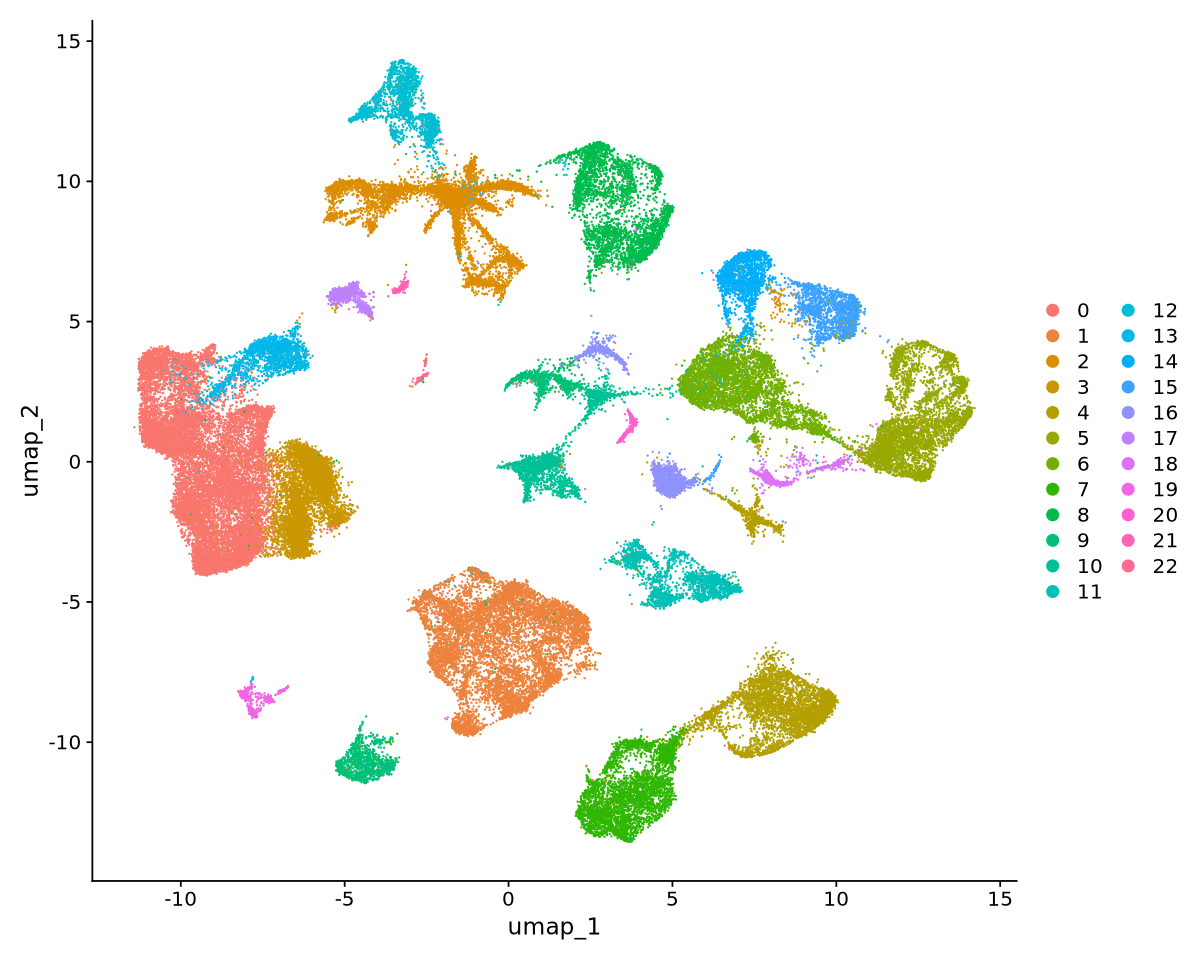

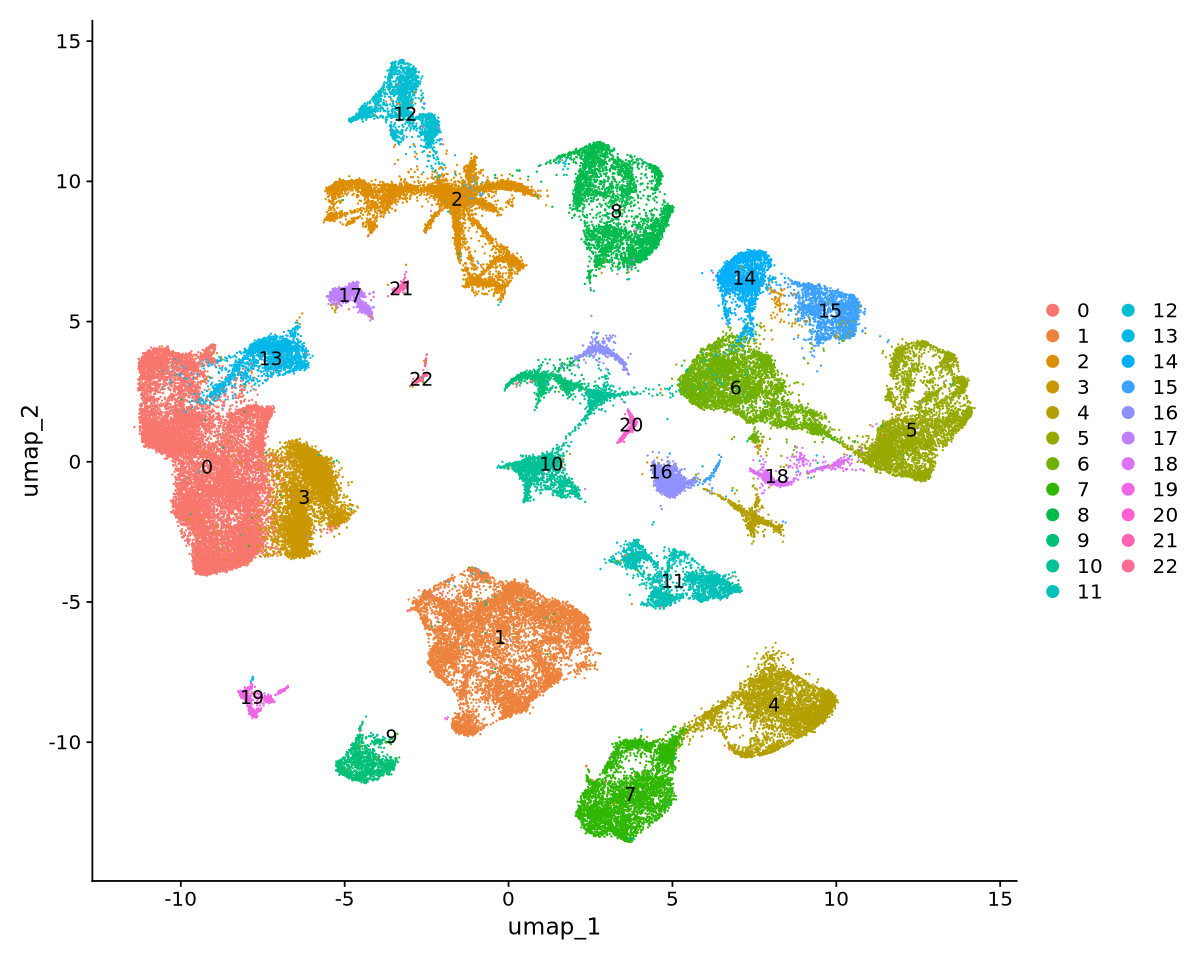

In [24]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [25]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE217517/GSE217517.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

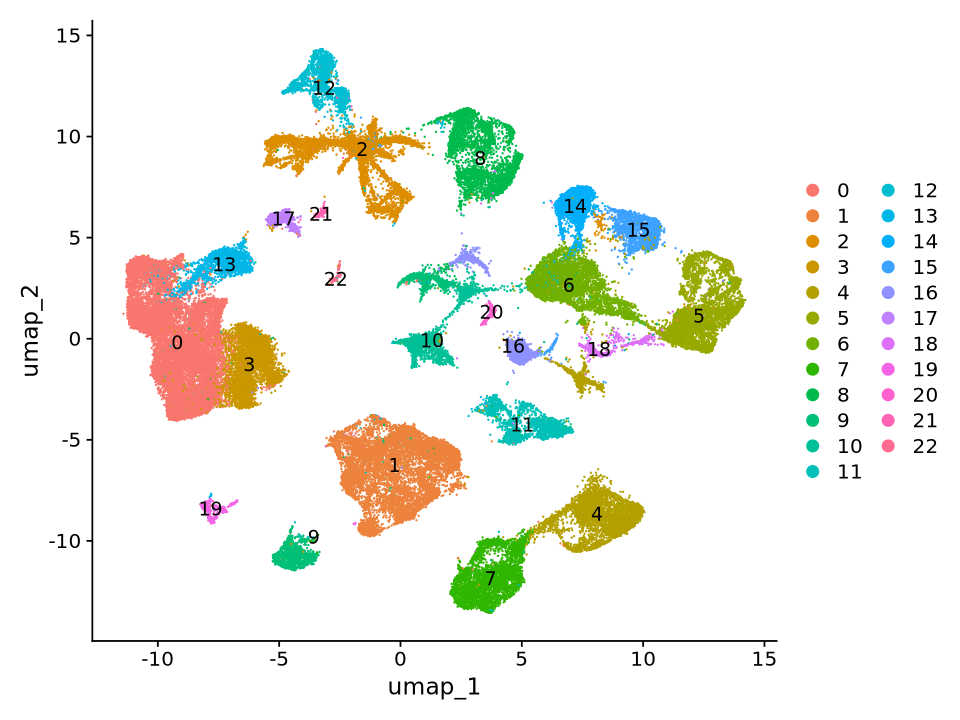

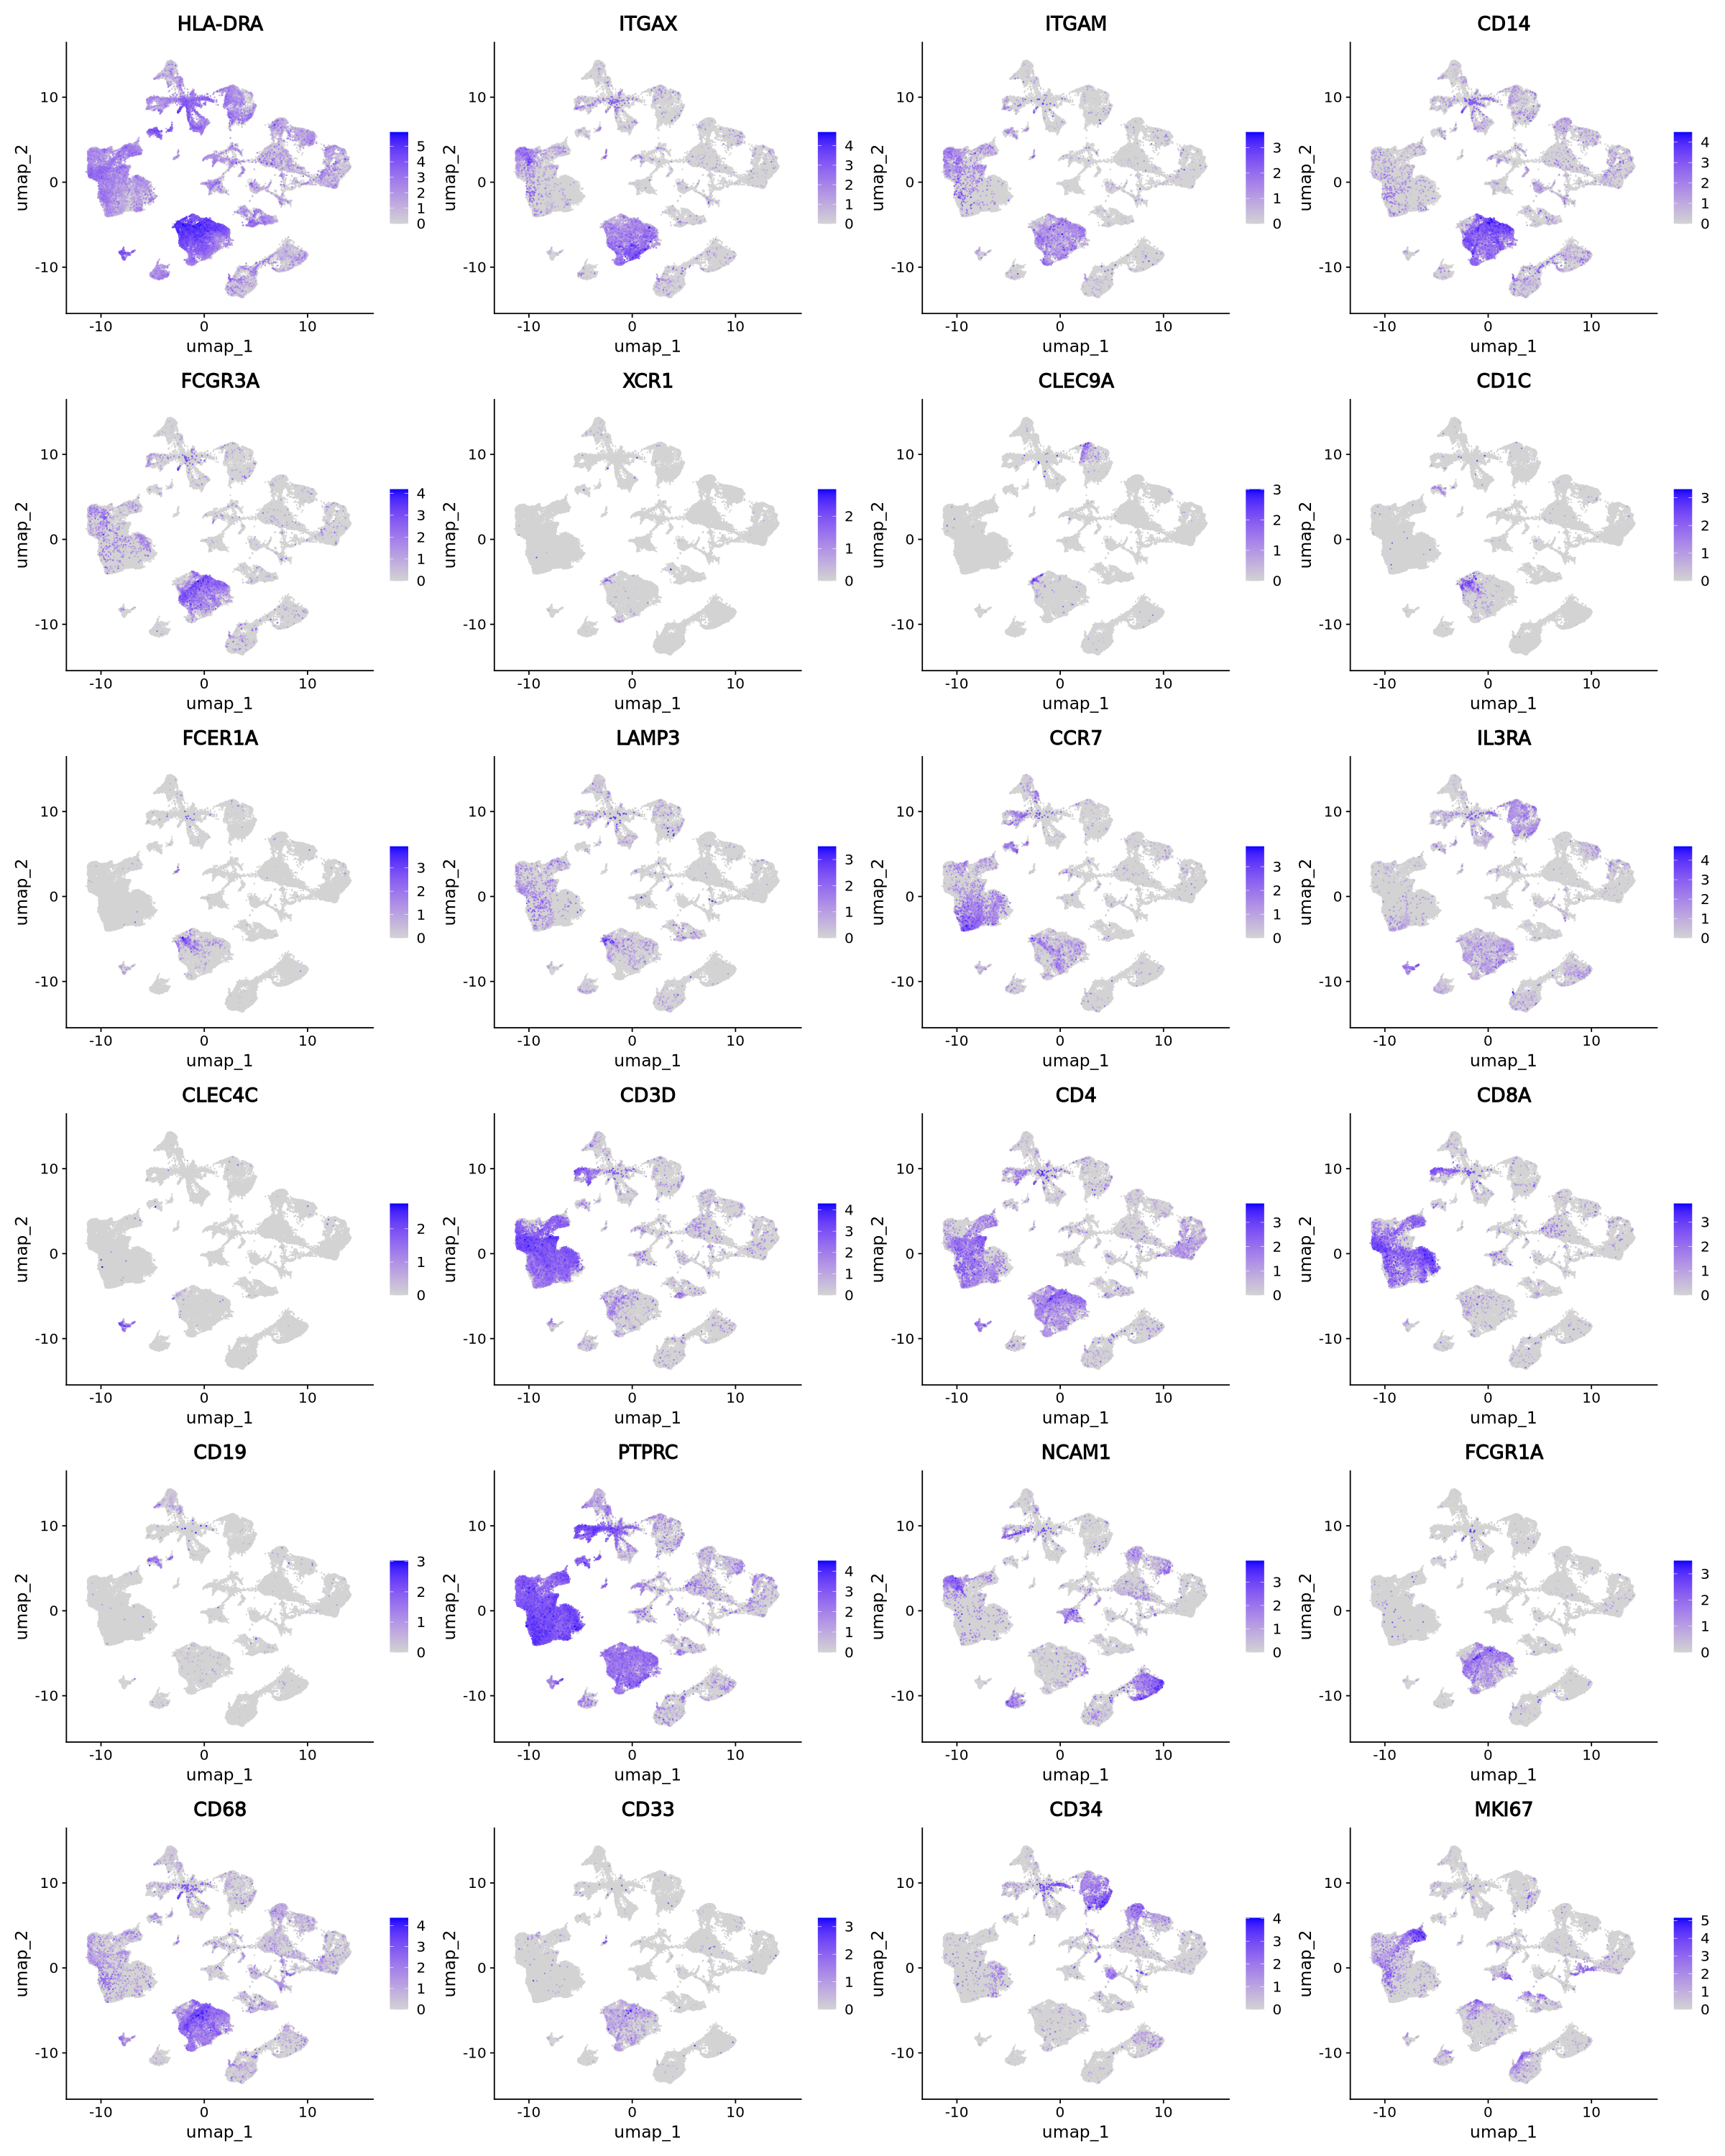

In [26]:
#plot genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

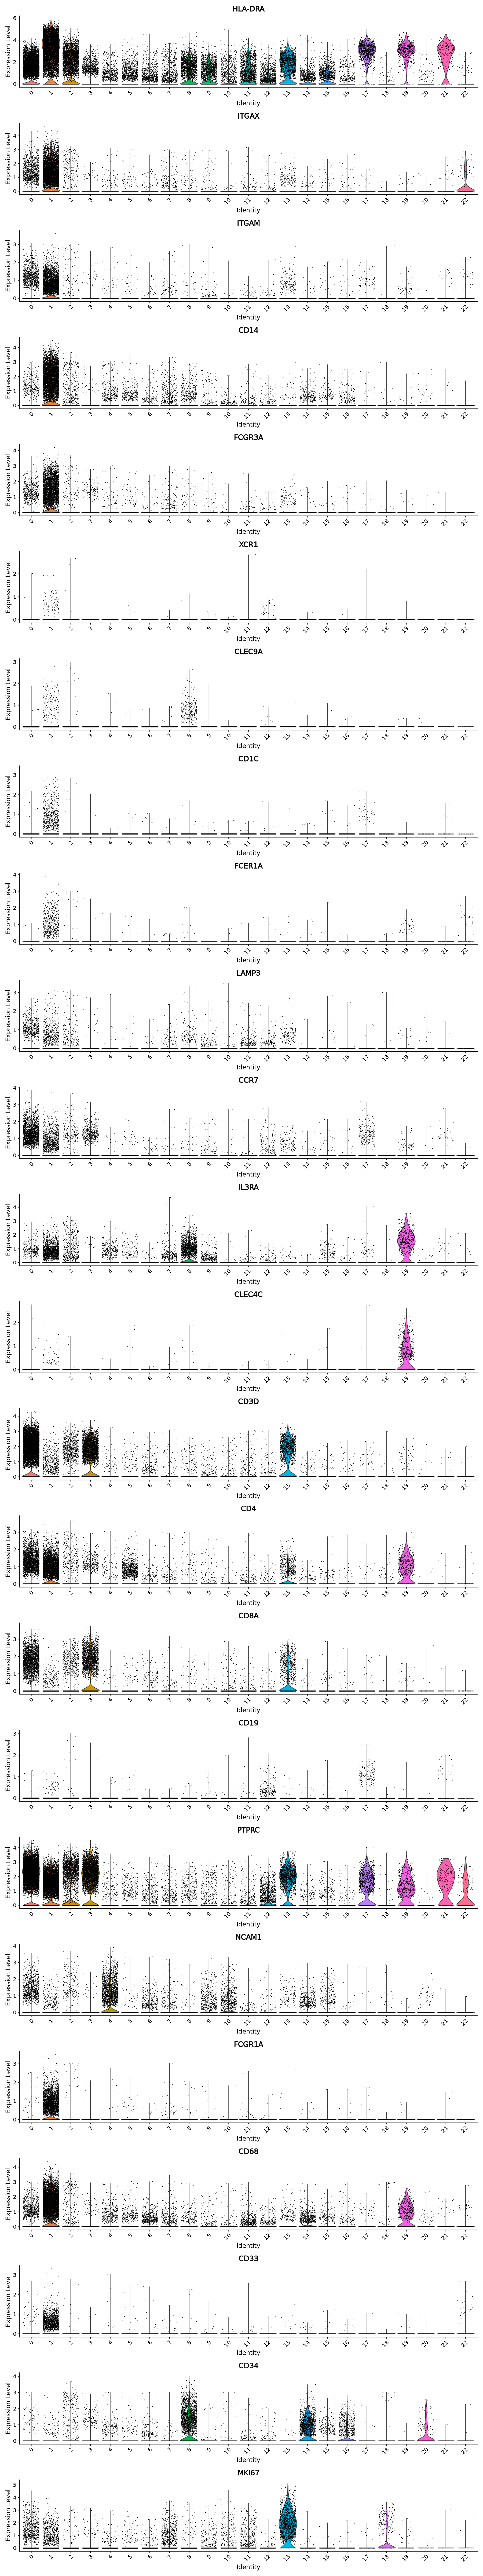

In [27]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

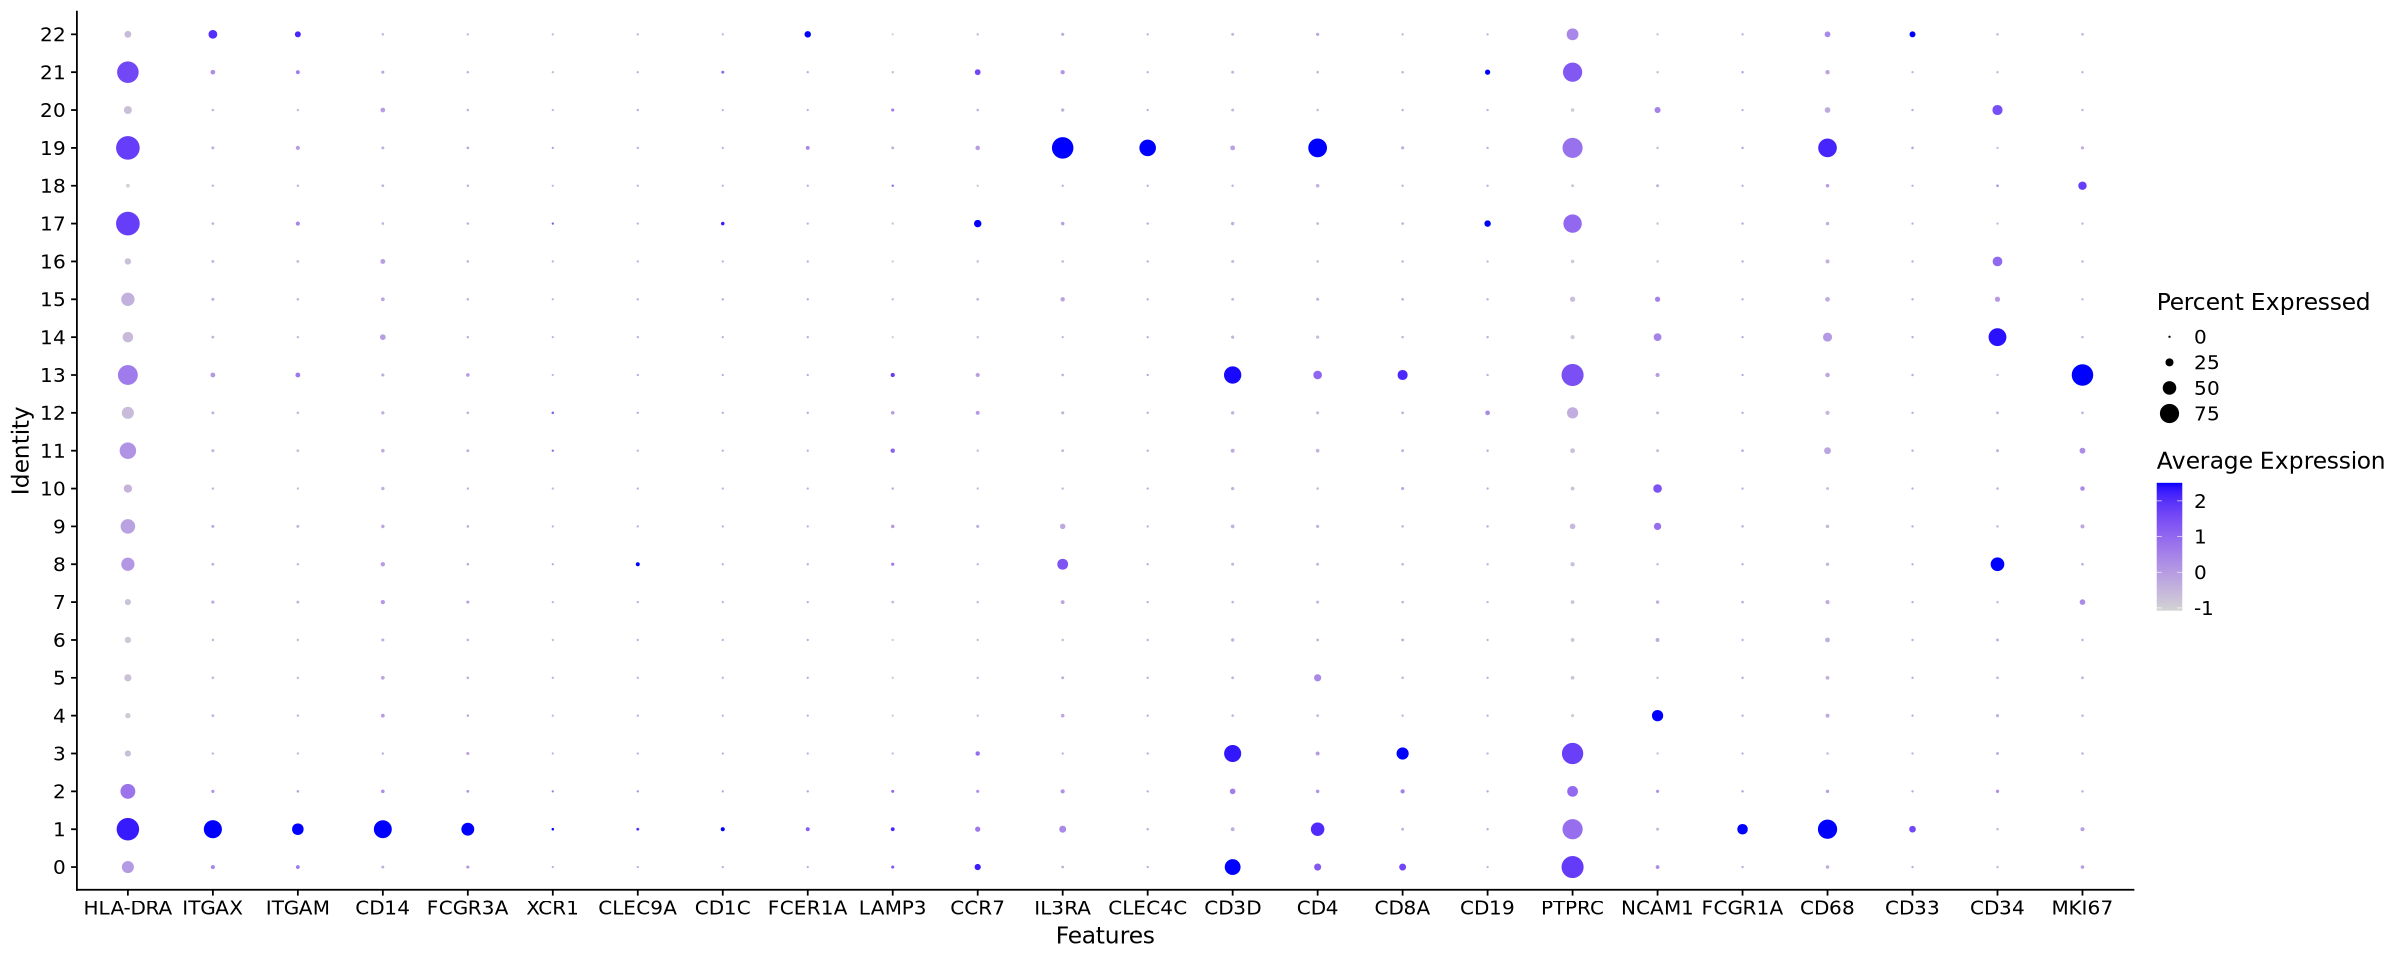

In [28]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [29]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
                                 percent.mt RNA_snn_res.0.5 seurat_clusters
GSE217517_pt1_AAACCCAAGATTGACA-1  1.730463  10              12             
GSE217517_pt1_AAACCCAAGCATGGGT-1  6.061044  32              21             
GSE217517_pt1_AAACCCAAGCGACATG-1 15.835890  16              15             
GSE217517_pt1_AAACCCAAGTAGCATA-1 21.643836  21              2              
GSE217517_pt1_AAACCCAAGTCACGCC-1 11.202938  24              5              
GSE217517_pt1_AAACCCAAGTCGAAGC-1  3.599374  4               2              
                                 RNA_snn_res.0.2
GSE217517_pt1_AAACCCAAGATTGACA-1 12             
GSE217517_pt1_AAACCCAAGCATGGGT-1 21             
GSE217517_pt1_AAACCCAAGCGACATG-1 15             
GSE217517_pt1_AAACCCAAGTAGCATA-1 2              
GSE217517_pt1_AAACCCAAGTCACGCC-1 5              
GSE217517_pt1_AAACCCAAGTCGAAGC-1 2

In [30]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [31]:
myeloid_OC

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [32]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE217517/GSE217517_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE217517/ /QRISdata/Q5935/nikita/scdata/GSE217517
```